In [2]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
import os
import cv2
import json
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import json
from PIL import Image

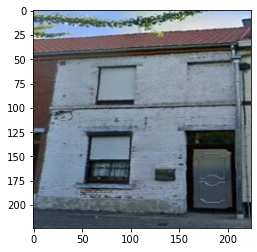

In [16]:
#read data 
#https://www.geeksforgeeks.org/convert-json-to-dictionary-in-python/
with open('/home/jupyter/large-dataset/_annotations.json') as json_file: 
    annot = json.load(json_file) 
data=[]
labels=[]
imagePaths = []
data_dir = "/home/jupyter/data"
for label in os.listdir(data_dir):
    for filename in os.listdir(os.path.sep.join([data_dir,label])):
        imagePath = os.path.sep.join([data_dir, label, filename])
        image = cv2.imread(imagePath)
        for item in annot['annotations']:
            if item == filename: 
                x = annot['annotations'][item][0]['x']
                y = annot['annotations'][item][0]['y']
                x2 = annot['annotations'][item][0]['x2']
                y2 = annot['annotations'][item][0]['y2']
        image = load_img(imagePath)
        width, height = image.size 
        image = image.crop((x*width, y*height, x2*width, y2*height))
        image = image.resize((224,224))
        plt.imshow(image)
        image = img_to_array(image) / 255.0
        data.append(image)
        labels.append(label)
        imagePaths.append(imagePath)
data = np.array(data)
labels = np.array(labels)
imagePaths = np.array(imagePaths)

In [3]:
#splitting large dataset
#https://datascience.stackexchange.com/questions/15135/train-test-validation-set-splitting-in-sklearn
train_ratio = 0.70
validation_ratio = 0.15
test_ratio = 0.15

# train is now 70% of the entire data set
# the _junk suffix means that we drop that variable completely
x_train, x_test, y_train, y_test = train_test_split(imagePaths, labels, test_size=1 - train_ratio)

# test is now 15% of the initial data set
# validation is now 15% of the initial data set
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 



/home/jupyter/large-dataset/data-large/Good/efd57ba9-c223-44a9-87f2-ccfe7136b4be.jpg
True
/efd57ba9-c223-44a9-87f2-ccfe7136b4be.jpg
/home/jupyter/large-dataset/data-large/Bad/194e2ae3-2e51-41f6-abda-85ec169fc19d.jpg
/194e2ae3-2e51-41f6-abda-85ec169fc19d.jpg


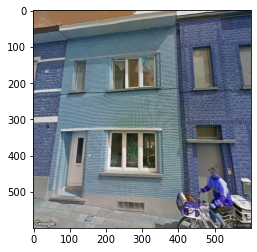

In [4]:
print(x_val[0])
print("Good" in x_val[0])
print(x_val[0][43:])
print(x_val[1])
print(x_val[1][42:])
plt.imshow(cv2.imread(x_val[0]))

/home/jupyter/large-dataset/data-large/Good/efd57ba9-c223-44a9-87f2-ccfe7136b4be.jpg
/home/jupyter/large-dataset/validation-data-large/Good/efd57ba9-c223-44a9-87f2-ccfe7136b4be.jpg
/home/jupyter/large-dataset/data-large/Bad/194e2ae3-2e51-41f6-abda-85ec169fc19d.jpg
/home/jupyter/large-dataset/validation-data-large/Bad/194e2ae3-2e51-41f6-abda-85ec169fc19d.jpg
/home/jupyter/large-dataset/data-large/Good/0769fef7-2b38-4685-a8ee-2169d5dfa1ef.jpg
/home/jupyter/large-dataset/validation-data-large/Good/0769fef7-2b38-4685-a8ee-2169d5dfa1ef.jpg
/home/jupyter/large-dataset/data-large/Bad/f406b302-33bd-4f19-8225-c7315a647ef3.jpg
/home/jupyter/large-dataset/validation-data-large/Bad/f406b302-33bd-4f19-8225-c7315a647ef3.jpg
/home/jupyter/large-dataset/data-large/Good/96212a44-3138-4455-ba34-304da55346bd.jpg
/home/jupyter/large-dataset/validation-data-large/Good/96212a44-3138-4455-ba34-304da55346bd.jpg
/home/jupyter/large-dataset/data-large/Good/10806c36-2be1-4f10-8eb0-36d7a9ce8d08.jpg
/home/jupyter/

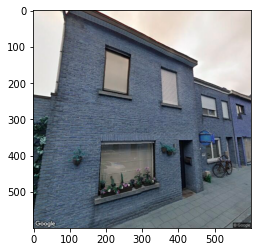

In [9]:
for image in x_val:
    filename="/home/jupyter/large-dataset/validation-data-large"
    print(image)
    img = cv2.imread(image)
    plt.imshow(img)
    if "Good" in image:
        label = "Good"
        imagename = image[44:]
    elif "Bad" in image:
        label = "Bad"
        imagename = image[43:]
    path = os.path.sep.join([filename,label,imagename])
    print(path)
    cv2.imwrite(path , img)
    

In [11]:
for image in x_test:
    filename="/home/jupyter/large-dataset/test-data-large"
    img = cv2.imread(image)
    if "Good" in image:
        label = "Good"
        imagename = image[44:]
    elif "Bad" in image:
        label = "Bad"
        imagename = image[43:]
    path = os.path.sep.join([filename,label,imagename])
    cv2.imwrite(path , img)

/home/jupyter/large-dataset/data-large/Good/25668291-7b91-437a-88ad-a3c1dd3637c0.jpg
/home/jupyter/large-dataset/train-data-large/Good/25668291-7b91-437a-88ad-a3c1dd3637c0.jpg
/home/jupyter/large-dataset/data-large/Good/666e3074-51ee-487a-a0b4-6ef30df2ccf3.jpg
/home/jupyter/large-dataset/train-data-large/Good/666e3074-51ee-487a-a0b4-6ef30df2ccf3.jpg
/home/jupyter/large-dataset/data-large/Good/9097c7e8-a7b7-4a6c-a5d0-db1acbcfbb69.jpg
/home/jupyter/large-dataset/train-data-large/Good/9097c7e8-a7b7-4a6c-a5d0-db1acbcfbb69.jpg
/home/jupyter/large-dataset/data-large/Good/9aeef929-785b-4644-9467-46757d9d562a.jpg
/home/jupyter/large-dataset/train-data-large/Good/9aeef929-785b-4644-9467-46757d9d562a.jpg
/home/jupyter/large-dataset/data-large/Bad/8d4877a2-5132-405f-9af5-17c8097780bc.jpg
/home/jupyter/large-dataset/train-data-large/Bad/8d4877a2-5132-405f-9af5-17c8097780bc.jpg
/home/jupyter/large-dataset/data-large/Bad/039cb1f9-efaa-404c-9bb0-644f307d476f.jpg
/home/jupyter/large-dataset/train-data

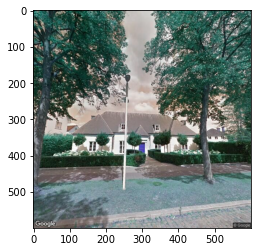

In [12]:
for image in x_train:
    filename="/home/jupyter/large-dataset/train-data-large"
    print(image)
    img = cv2.imread(image)
    plt.imshow(img)
    if "Good" in image:
        label = "Good"
        imagename = image[44:]
    elif "Bad" in image:
        label = "Bad"
        imagename = image[43:]
    path = os.path.sep.join([filename,label,imagename])
    print(path)
    cv2.imwrite(path , img)

data augmentation

In [21]:
import tensorflow as tf

IMAGE_SIZE=(224,224)
data_dir = '/home/jupyter/large-dataset/train-data-large/'
datagen_kwargs = dict(rescale=1./255, dtype = 'float32')
dataflow_kwargs = dict(target_size=IMAGE_SIZE, batch_size=500,
                   interpolation="bilinear")
#valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
 #   **datagen_kwargs)
#valid_generator = valid_datagen.flow_from_directory(
 #   data_dir, subset="validation", shuffle=False, **dataflow_kwargs)

for label in ["Good", "Bad"]:
    train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
      horizontal_flip=True,
      width_shift_range=0.4,
      shear_range=0.4, zoom_range=0.4,
      brightness_range = [0.5, 1.0],
      **datagen_kwargs)
    train_generator = train_datagen.flow_from_directory(
    data_dir, shuffle=True, **dataflow_kwargs, save_to_dir="/home/jupyter/large-dataset/train-augmented-data-large/"+label, save_format="jpg", classes=[label])
    batch = next(train_generator)

Found 327 images belonging to 1 classes.
Found 128 images belonging to 1 classes.


In [22]:
label="Bad"
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
      horizontal_flip=True,
      width_shift_range=0.3,
      shear_range=0.3, zoom_range=0.3,
      brightness_range = [1.0, 1.5],
      **datagen_kwargs)
train_generator = train_datagen.flow_from_directory(
    data_dir, shuffle=True, **dataflow_kwargs, save_to_dir="/home/jupyter/large-dataset/train-augmented-data-large/"+label, save_format="jpg", classes=[label])
batch = next(train_generator)

Found 128 images belonging to 1 classes.


In [18]:
label="Bad"
for filename in os.listdir(os.path.sep.join([aug_data_dir,label])):
    imagePath = os.path.sep.join([direct, label, filename])
    image = cv2.imread(imagePath)
    image = load_img(imagePath, target_size=(224, 224))
    image.save(os.path.sep.join([comp_dir, "augmented", label, filename]), optimize=True, quality=30) 

In [17]:
print(len(os.listdir('/home/jupyter/large-dataset/train-data-large/Bad')))
print(len(os.listdir('/home/jupyter/large-dataset/train-data-large/Good')))

128
327


In [18]:
print(len(os.listdir('/home/jupyter/large-dataset/validation-data-large/Bad')))
print(len(os.listdir('/home/jupyter/large-dataset/validation-data-large/Good')))

17
81


In [19]:
print(len(os.listdir('/home/jupyter/large-dataset/test-data-large/Bad')))
print(len(os.listdir('/home/jupyter/large-dataset/test-data-large/Good')))

30
68


In [20]:
print(len(os.listdir('/home/jupyter/large-dataset/data-large/Bad')))
print(len(os.listdir('/home/jupyter/large-dataset/data-large/Good')))

175
476


In [3]:
print(len(os.listdir('/home/jupyter/large-dataset/train-augmented-data-large/Bad')))
print(len(os.listdir('/home/jupyter/large-dataset/train-augmented-data-large/Good')))

256
327


In [4]:
print(len(os.listdir('/home/jupyter/data/Bad')))
print(len(os.listdir('/home/jupyter/data/Good')))

87
238
